# WeatherPy
----

#### Observation
1. The further you go from the equator, the more likely colder/max temperature it would be.
2. Couldn't see a correlation between latitude and cloudiness in general.
3. As of when the weather date was captured, there was very little correlation between windspeed and latitude in the Northern Hemisphere whereas it was relatively more discernable in the South (ie: further away from the equator, the higher wind speed)


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* Convert Raw Data to DataFrame


In [3]:
# Dataframe to store 
data_df = pd.DataFrame()

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    print(f"Checking weather in {city}")
    data = requests.get(url).json()
    
    try:
        tmp_df = pd.DataFrame([{
            'City':data['name'],
            'Lat':data['coord']['lat'],
            'Lon':data['coord']['lon'],
            'Max Temp':data['main']['temp_max'],
            'Humidity':data['main']['humidity'],
            'Cloudiness':data['clouds']['all'],
            'Wind Speed':data['wind']['speed'],
            'Country':data['sys']['country'],
            'Date':data['dt']
        }])
        # Collect each city's weather data into the dataframe.
        data_df = data_df.append(tmp_df, ignore_index=True)
    # Some cities may not be real and return any data
    except KeyError:
        print(f"One or more data points missing for {city}")





Checking weather in illoqqortoormiut
One or more data points missing for illoqqortoormiut
Checking weather in atuona
Checking weather in hunza
One or more data points missing for hunza
Checking weather in bluff
Checking weather in hilo
Checking weather in mys shmidta
One or more data points missing for mys shmidta
Checking weather in cacule
Checking weather in airai
Checking weather in hithadhoo
Checking weather in albany
Checking weather in gizo
Checking weather in vanavara
Checking weather in puerto ayora
Checking weather in rawson
Checking weather in bulgan
Checking weather in geraldton
Checking weather in lebu
Checking weather in vardo
Checking weather in srednyaya akhtuba
Checking weather in sao joao da barra
Checking weather in sorvag
One or more data points missing for sorvag
Checking weather in okhotsk
Checking weather in debre tabor
Checking weather in castro
Checking weather in muroto
Checking weather in ballina
Checking weather in cape town
Checking weather in half moon bay

* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_df.to_csv('city_weather_data.csv', encoding='utf-8')
data_df.head()


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabang,5.8933,95.3214,82.20,68,40,4.79,ID,1616104624
1,Mataura,-46.1927,168.8643,53.01,96,90,1.99,NZ,1616104625
2,Thompson,55.7435,-97.8558,50.00,34,40,10.36,CA,1616104546
3,Nyurba,63.2842,118.3319,11.07,93,97,10.04,RU,1616104626
4,Hermanus,-34.4187,19.2345,61.00,87,71,7.11,ZA,1616104626


In [5]:
# Show statistical summary
data_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.747767,14.178583,53.450160,73.337478,54.424512,7.976750,1.616105e+09
std,32.645286,89.807590,27.055542,21.428433,38.644183,5.281937,1.253132e+02
min,-54.800000,-175.200000,-38.450000,10.000000,0.000000,0.220000,1.616104e+09
25%,-4.148150,-59.873400,35.600000,64.000000,19.000000,3.825000,1.616105e+09
50%,27.037700,16.150000,60.800000,79.000000,69.000000,6.910000,1.616105e+09
75%,49.702900,91.729300,75.200000,89.000000,90.000000,10.455000,1.616105e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,27.380000,1.616105e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check to see whether there are any cities with 100% humidity
data_df[data_df['Humidity'] >= 100]


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
28,Srednyaya Akhtuba,48.7089,44.8667,33.80,100,90,4.47,RU,1616104640
41,Lufilufi,-13.8745,-171.5986,77.00,100,90,6.91,WS,1616104649
58,Sola,-13.8833,167.5500,77.00,100,90,13.20,VU,1616104659
75,Ketchikan,55.3422,-131.6461,39.20,100,90,2.06,US,1616104669
79,Negombo,7.2083,79.8358,77.00,100,40,3.44,LK,1616104672
137,Klaksvík,62.2266,-6.5890,44.60,100,90,13.80,FO,1616104707
143,Padang,-0.9492,100.3543,75.20,100,75,4.61,ID,1616104711
146,Palmer,42.1584,-72.3287,43.00,100,90,5.75,US,1616104713
155,Nidzica,53.3605,20.4275,26.60,100,0,6.91,PL,1616104660
206,Bulancak,40.9372,38.2291,48.20,100,75,9.22,TR,1616104750


In [7]:
# Get the indices of cities that have humidity over 100%.
# See https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf for how to get indices of matched rows
idx = data_df[data_df['Humidity'] >= 100].index
print(idx)

Int64Index([ 28,  41,  58,  75,  79, 137, 143, 146, 155, 206, 233, 254, 271,
            308, 312, 330, 346, 399, 403, 407, 412, 428, 438, 468, 488, 507,
            516],
           dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = data_df.drop(idx, inplace=False)

In [9]:
# Let's confirm there are no cities with 100% humidity
clean_city_data[clean_city_data['Humidity'] >= 100]

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

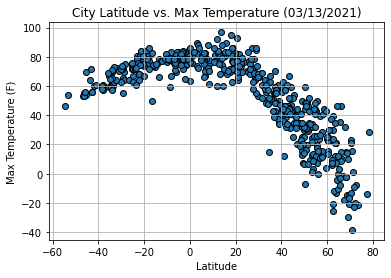

In [10]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("latitude_maxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

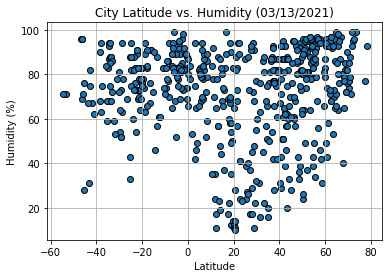

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

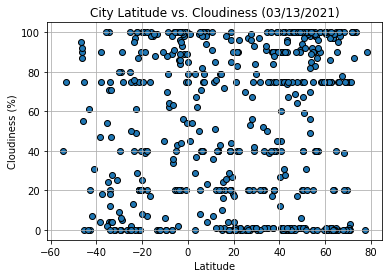

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

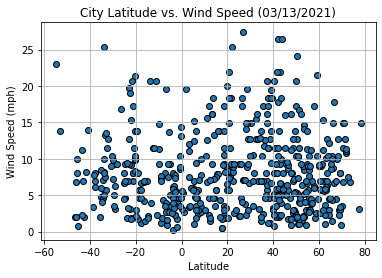

In [13]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (03/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("latitude_windspeed.png")
plt.show()

## Linear Regression

In [14]:
#clean_city_data[clean_city_data['Lat'] >= 0]['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8837644358334872


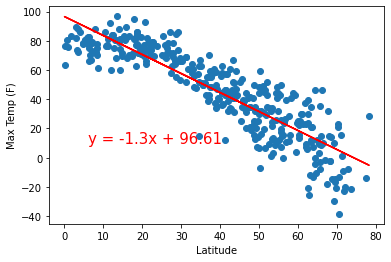

In [15]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7468408403042285


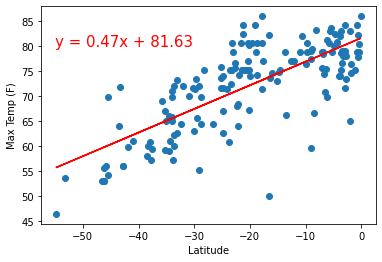

In [16]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_maxtemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.288678209367237


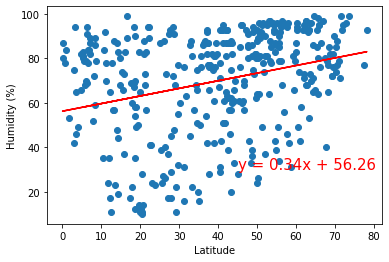

In [17]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23123882327847214


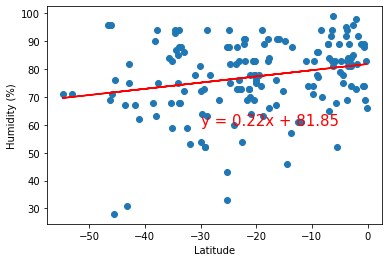

In [18]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09883844066872441


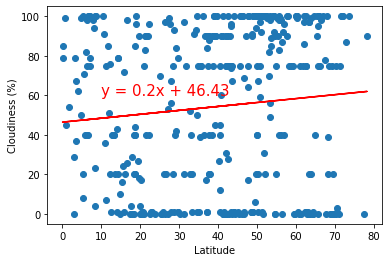

In [19]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2408776537988638


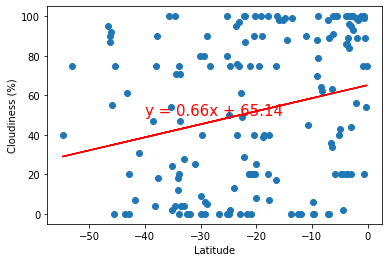

In [20]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.018331529445330882


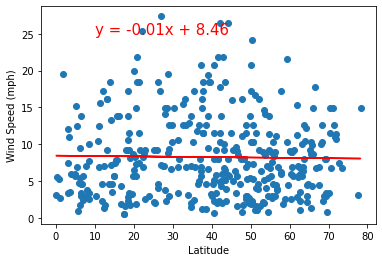

In [21]:
x_values = clean_city_data[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] >= 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("north_latitude_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1528758431377321


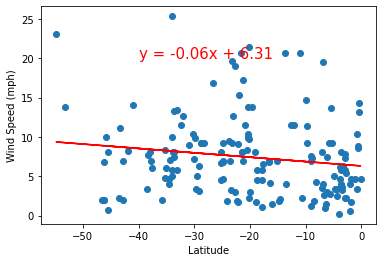

In [22]:
x_values = clean_city_data[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data[clean_city_data['Lat'] <= 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("south_latitude_wind.png")
plt.show()
